### **대치동**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.display.float_format = '{:}'.format


---
##### **함수**
- 결측치 확인: find_missing_value(df)
- 이상치 확인: find_outlier(df, exclusions)
- 이상치 반환: return_outlier(df, exclusions)
- 이상치 제거한 데이터프레임 반환: remove_outliers(df, outliers_list)
##### **변수**
- 2023년 데이터프레임: 길단위인구_df_2023
- 이상치 탐색 시 사용하는 예외 칼럼 리스트: exclusions
- 상권_코드_명 중복 없는 리스트: 상권_list

In [10]:
# 결측치 수 출력하는 함수 생성
def find_missing_value(df):
    print("결측치 확인\n")
    
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        print(f"{column}: {missing_count}")


In [92]:
# 이상치 확인하는 함수 생성
def find_outlier(df, exclusions=['기준_년분기_코드']):
    print("이상치 확인\n")
    
    for column in df.columns:
        if column in exclusions:
            continue
        
        # 1사분위수 및 3사분위수 계산
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        
        # IQR 계산
        iqr = q3 - q1
        
        # 이상치 경계 계산
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # 이상치 여부 판별
        outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
        if outlier.any():
            print(f"{column}| 1사분위수: %.2f, 3사분위수: %.2f" % (q1, q3))
            outliers = df.loc[outlier, ['상권_코드_명', '기준_년분기_코드', column]]
            for idx, row in outliers.iterrows():
                print(f"\t{row[column]}({row['상권_코드_명']} {row['기준_년분기_코드']})")
        else:
            print(f"{column}| 이상치 없음")


In [93]:
# 이상치 반환하는 함수 생성
def return_outlier(df, exclusions=['기준_년분기_코드']):
    outliers_list = []
    
    for column in df.columns:
        if column in exclusions:
            continue
        
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
        if outlier.any():
            outliers = df.loc[outlier, ['상권_코드_명', '기준_년분기_코드', column]]
            for idx, row in outliers.iterrows():
                # [상권_코드_명, 기준_년분기_코드, 이상치가 발견된 column, 이상치] 로 이루어진 list 생성
                outliers_list.append([row['상권_코드_명'], row['기준_년분기_코드'], column, row[column]])

    return outliers_list if outliers_list else None


In [27]:
# 이상치 제거한 데이터프레임을 반환하는 함수 생성
def remove_outliers(df, outliers_list):
    new_df = df.copy()
    
    for outlier in outliers_list:
        new_df = new_df.drop(new_df[(new_df['상권_코드_명'] == outlier[0]) & (new_df['기준_년분기_코드'] == outlier[1]) & (new_df[outlier[2]] == outlier[3])].index)
    
    return new_df


---
##### **파일 가져오기**

In [4]:
# 경로 설정

path1 = '대치동(길단위인구).csv'
path2 = '대치동(상주인구).csv'
path3 = '대치동(소득소비).csv'
path4 = '대치동(점포).csv'
path5 = '대치동(직장인구).csv'
path6 = '대치동(추정매출).csv'


In [5]:
# csv 파일 읽어오기 (encoding = 'cp949')

길단위인구_df = pd.read_csv(path1, encoding = 'cp949')
상주인구_df = pd.read_csv(path2, encoding = 'cp949')
소득소비_df = pd.read_csv(path3, encoding = 'cp949')
점포_df = pd.read_csv(path4, encoding = 'cp949')
직장인구_df = pd.read_csv(path5, encoding = 'cp949')
추정매출_df = pd.read_csv(path6, encoding = 'cp949')


In [9]:
# 2023년 1 ~ 3분기 데이터 가져오기

길단위인구_df_2023 = 길단위인구_df[길단위인구_df['기준_년분기_코드'].astype(str).str.startswith('2023') & ~길단위인구_df['기준_년분기_코드'].astype(str).str.endswith('4')]
상주인구_df_2023 = 상주인구_df[상주인구_df['기준_년분기_코드'].astype(str).str.startswith('2023') & ~상주인구_df['기준_년분기_코드'].astype(str).str.endswith('4')]
소득소비_df_2023 = 소득소비_df[소득소비_df['기준_년분기_코드'].astype(str).str.startswith('2023') & ~소득소비_df['기준_년분기_코드'].astype(str).str.endswith('4')]
점포_df_2023 = 점포_df[점포_df['기준_년분기_코드'].astype(str).str.startswith('2023') & ~점포_df['기준_년분기_코드'].astype(str).str.endswith('4')]
직장인구_df_2023 = 직장인구_df[직장인구_df['기준_년분기_코드'].astype(str).str.startswith('2023') & ~직장인구_df['기준_년분기_코드'].astype(str).str.endswith('4')]
추정매출_df_2023 = 추정매출_df[추정매출_df['기준_년분기_코드'].astype(str).str.startswith('2023') & ~추정매출_df['기준_년분기_코드'].astype(str).str.endswith('4')]


---
##### 길단위인구

In [20]:
길단위인구_df_2023.columns


Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '총_유동인구_수',
       '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수',
       '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
       '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
       '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수',
       '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수',
       '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

In [41]:
# 결측치 확인

find_missing_value(길단위인구_df_2023)


결측치 확인

기준_년분기_코드: 0
상권_구분_코드: 0
상권_구분_코드_명: 0
상권_코드: 0
상권_코드_명: 0
총_유동인구_수: 0
남성_유동인구_수: 0
여성_유동인구_수: 0
연령대_10_유동인구_수: 0
연령대_20_유동인구_수: 0
연령대_30_유동인구_수: 0
연령대_40_유동인구_수: 0
연령대_50_유동인구_수: 0
연령대_60_이상_유동인구_수: 0
시간대_00_06_유동인구_수: 0
시간대_06_11_유동인구_수: 0
시간대_11_14_유동인구_수: 0
시간대_14_17_유동인구_수: 0
시간대_17_21_유동인구_수: 0
시간대_21_24_유동인구_수: 0
월요일_유동인구_수: 0
화요일_유동인구_수: 0
수요일_유동인구_수: 0
목요일_유동인구_수: 0
금요일_유동인구_수: 0
토요일_유동인구_수: 0
일요일_유동인구_수: 0


In [91]:
# 이상치 확인

exclusions = ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명']
find_outlier(길단위인구_df_2023, exclusions)


이상치 확인

총_유동인구_수| 1사분위수: 600192.75, 3사분위수: 1285322.50
	5502206(선릉역 20233)
	5426721(선릉역 20232)
	5348663(선릉역 20231)
남성_유동인구_수| 1사분위수: 299421.00, 3사분위수: 678422.25
	2757255(선릉역 20233)
	2742060(선릉역 20232)
	2711690(선릉역 20231)
여성_유동인구_수| 1사분위수: 299509.50, 3사분위수: 606899.25
	2744951(선릉역 20233)
	2684661(선릉역 20232)
	2636972(선릉역 20231)
연령대_10_유동인구_수| 없음
연령대_20_유동인구_수| 1사분위수: 67018.75, 3사분위수: 195284.25
	956298(선릉역 20233)
	949449(선릉역 20232)
	940361(선릉역 20231)
연령대_30_유동인구_수| 1사분위수: 78773.50, 3사분위수: 202310.75
	1283691(선릉역 20233)
	1316935(선릉역 20232)
	1290690(선릉역 20231)
연령대_40_유동인구_수| 1사분위수: 116709.75, 3사분위수: 237442.00
	1109403(선릉역 20233)
	1106298(선릉역 20232)
	1099499(선릉역 20231)
연령대_50_유동인구_수| 1사분위수: 78983.00, 3사분위수: 146545.50
	736766(선릉역 20233)
	272825(도곡초등학교 20233)
	731088(선릉역 20232)
	259106(도곡초등학교 20232)
	715438(선릉역 20231)
	252398(도곡초등학교 20231)
연령대_60_이상_유동인구_수| 1사분위수: 71604.00, 3사분위수: 124879.75
	684205(선릉역 20233)
	224513(도곡초등학교 20233)
	671141(선릉역 20232)
	217098(도곡초등학교 20232)
	655465(선릉역 20231)
	21555

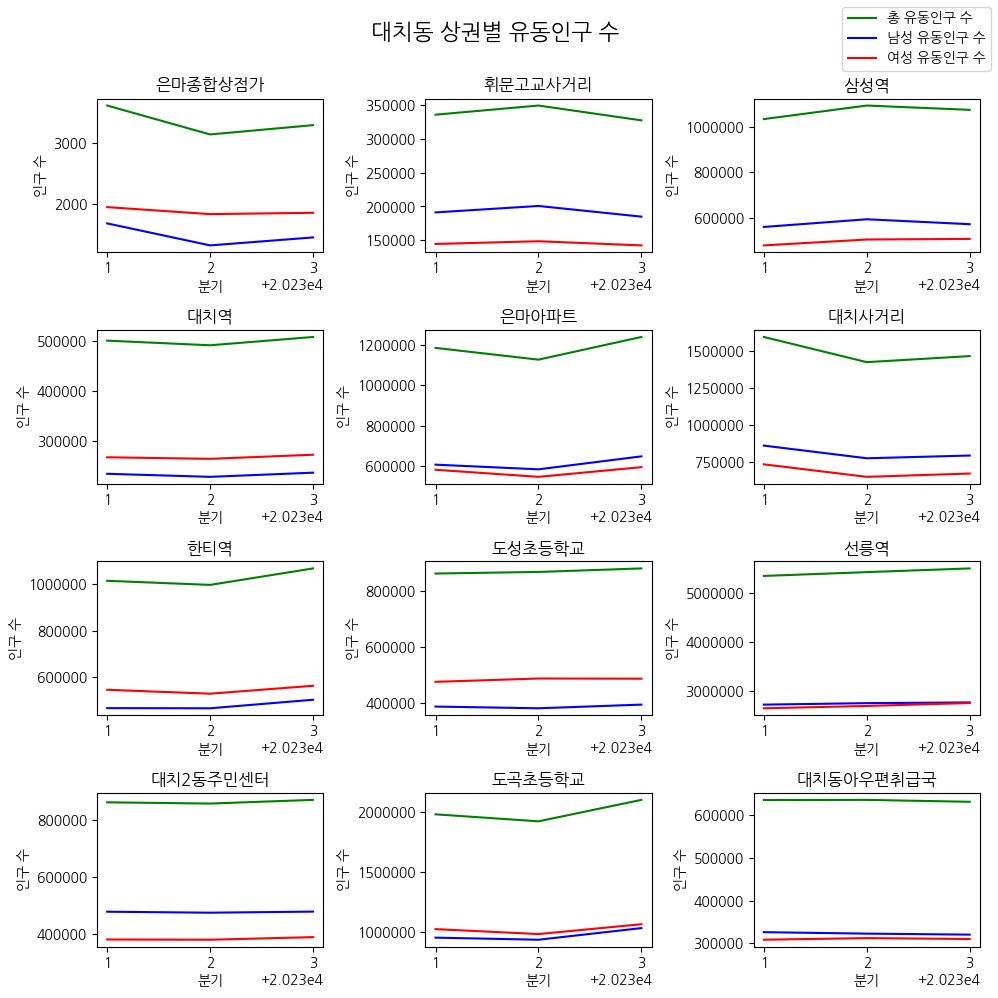

In [99]:
# 상권별 시각화

상권_list = 길단위인구_df_2023['상권_코드_명'].unique()

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (10, 10))
fig.suptitle('대치동 상권별 유동인구 수\n', fontsize = 16)
plt.rcParams['font.family'] = 'NanumGothic'

for idx, 상권 in enumerate(상권_list):
    ax = axes[idx // 3, idx % 3]
    
    길단위인구_df_2023[길단위인구_df_2023['상권_코드_명'] == 상권].plot(x = '기준_년분기_코드', y = '총_유동인구_수', ax = ax, color = 'g', legend = False)
    길단위인구_df_2023[길단위인구_df_2023['상권_코드_명'] == 상권].plot(x = '기준_년분기_코드', y = '남성_유동인구_수', ax = ax, color = 'b', legend = False)
    길단위인구_df_2023[길단위인구_df_2023['상권_코드_명'] == 상권].plot(x = '기준_년분기_코드', y = '여성_유동인구_수', ax = ax, color = 'r', legend = False)
    ax.set_title(상권)
    ax.set_xlabel('분기')
    ax.set_ylabel('인구 수')
    ax.ticklabel_format(style = 'plain', axis = 'y')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer = True))
fig.legend(['총 유동인구 수', '남성 유동인구 수', '여성 유동인구 수'], loc = 'upper right')

plt.tight_layout()
plt.show()


In [108]:
# 상권 종류
